# US Housing Market Predictions – Real Estate Market Forecast

Will there be a Housing Crash in 2019 in cities across the nation? The growing strength of the new US economy, GDP/Consumer demand, housing demand, improving employment and wages, ideal demographics and good personal debt situation of most Americans makes it seem unlikely.

Yet, a high number of investors and homebuyers are still concerned about a housing bubble in their cities, and perhaps even a housing market crash in  2019 or 2020. The conditions that created the last crash in 2007 are different, as you can read below, but rising interest rates, the coming elections, US political and global political turmoil could burst the bubble in many cities.


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 7 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this assignemt challenges you to predict the final price of each home.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
#%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../data/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../data/Housing_USA"))


['USA_Housing.csv']


C:\Users\pk.mpp\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\pk.mpp\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\pk.mpp\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\pk.mpp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\pk.mpp\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\User

In [30]:
dataset = pd.read_csv('../data/Housing_USA/USA_Housing.csv')

# Any results you write to the current directory are saved as output.
dataset

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [6]:
dataset.shape

(5000, 7)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [8]:
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [11]:
dataset.isna()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [12]:
dataset[dataset.isna().any(axis=1)]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


In [13]:
dataset.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

# EDA - Exploratory Data Analysis in details

In [14]:
# To get whole EDA (Exploratory Data Analysis)
pandas_profiling.ProfileReport(dataset)

Number of variables,7
Number of observations,5000
Total Missing (%),0.0%
Total size in memory,273.5 KiB
Average record size in memory,56.0 B
Numeric,6
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,0


Let's create some simple plots to check out the data!

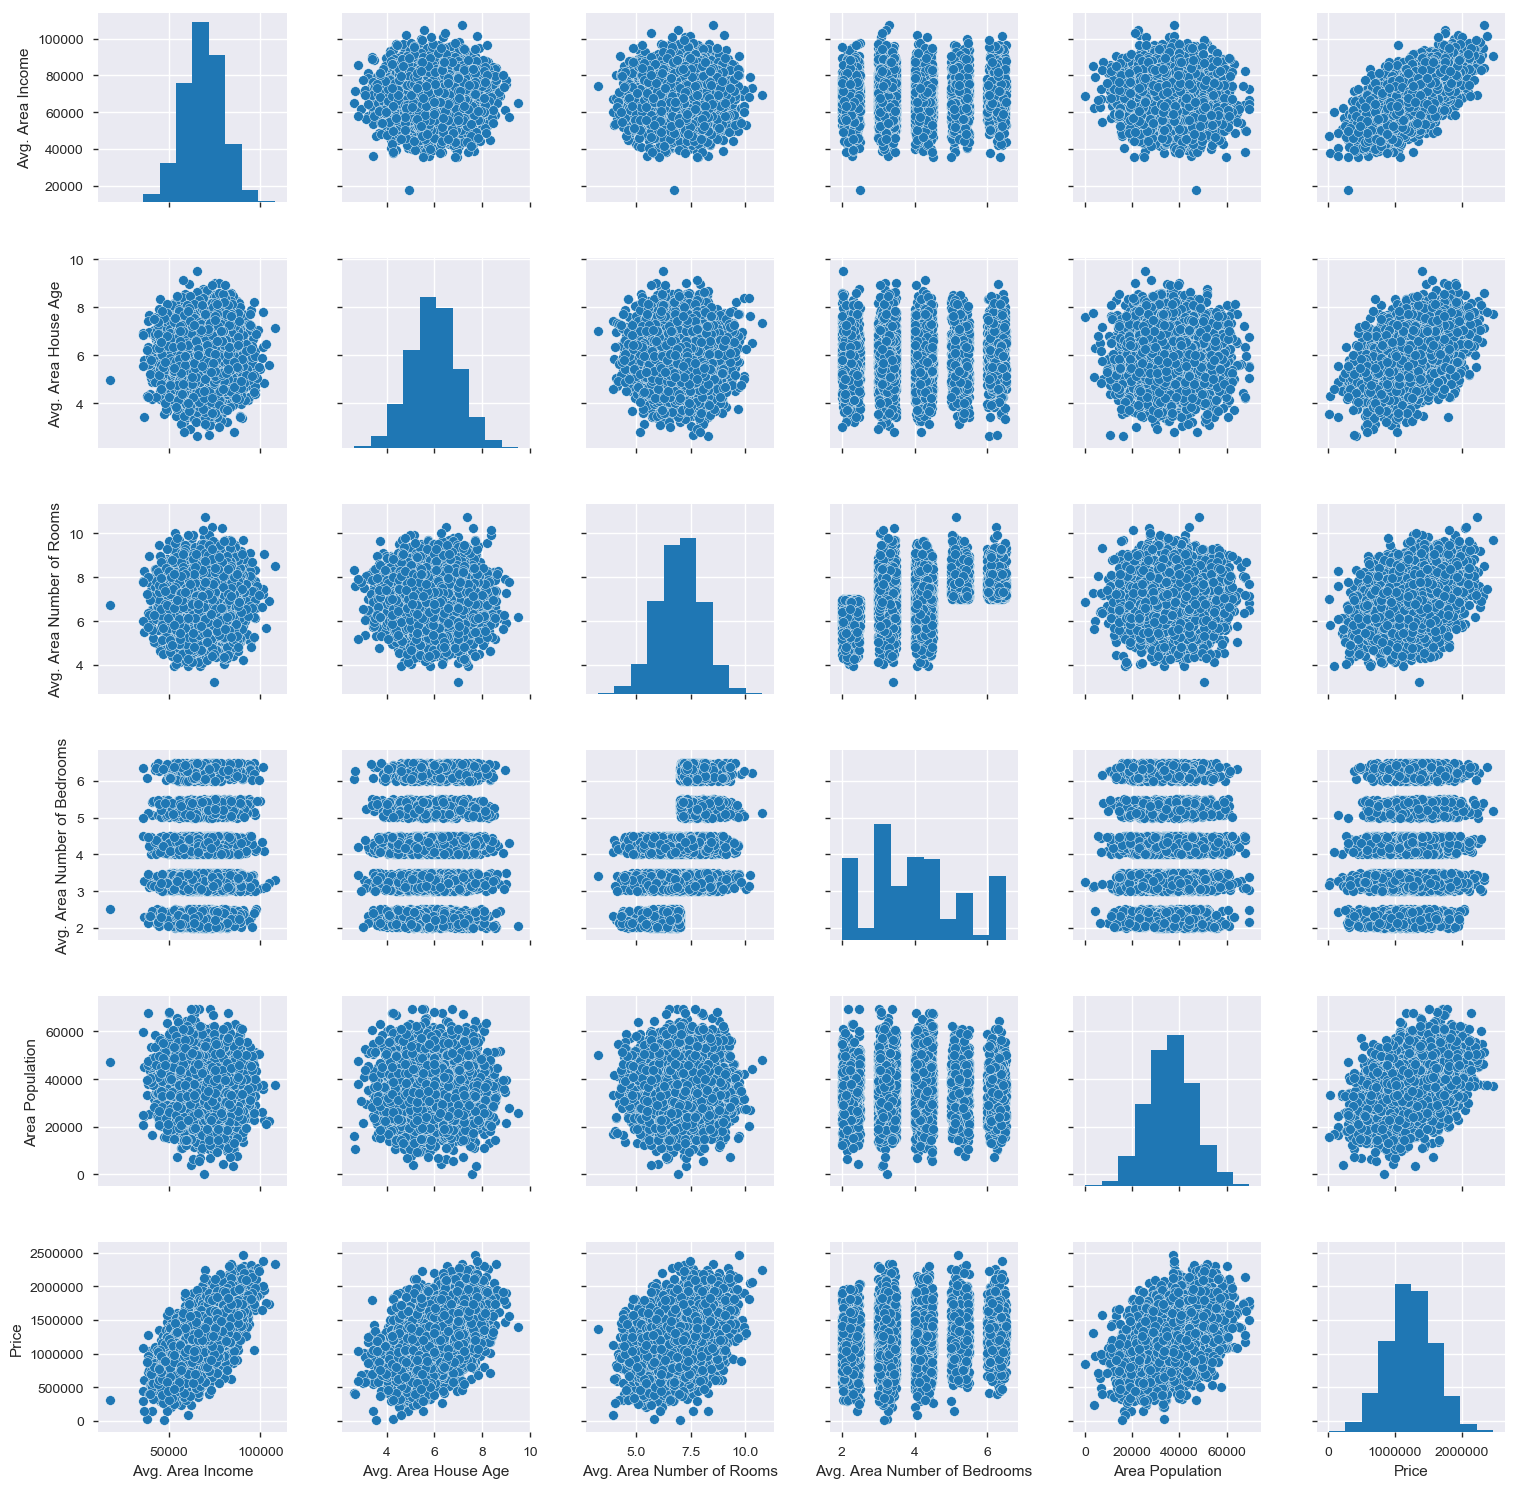

In [15]:
sns.pairplot(dataset)

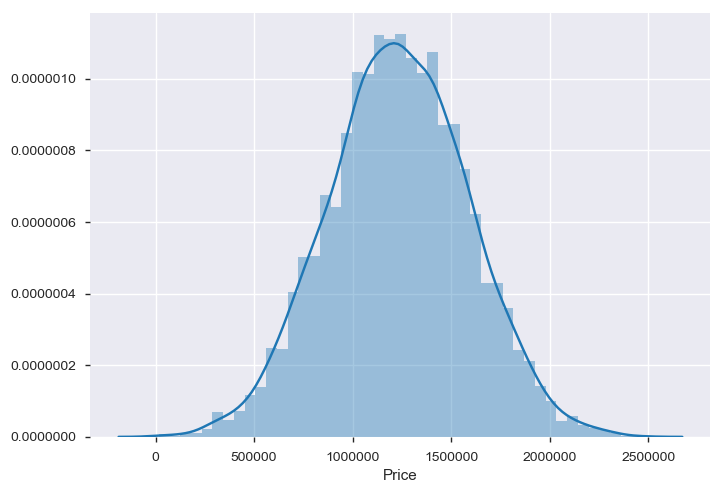

In [16]:
sns.distplot(dataset['Price'])

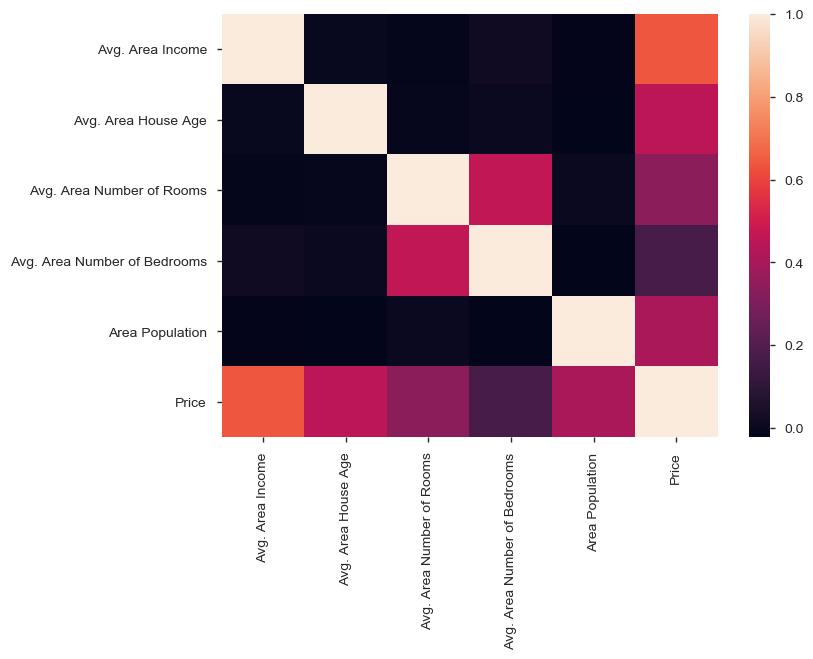

In [17]:
sns.heatmap(dataset.corr())

# Training a Linear Regression Model
Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

# X and y arrays

In [18]:
X = dataset[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = dataset['Price']

# Train Test Split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Creating and Training the Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [23]:
# print the intercept
print(lm.intercept_)

-2640159.796851911


In [24]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


# Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Avg. Area Income is associated with an increase of $21.52 .
Holding all other features fixed, a 1 unit increase in Avg. Area House Age is associated with an increase of $164883.28 .
Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms is associated with an increase of $122368.67 .
Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedrooms is associated with an increase of $2233.80 .
Holding all other features fixed, a 1 unit increase in Area Population is associated with an increase of $15.15 .
Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the boston dataset:

from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)
boston_df = boston.data
# Predictions from our Model
Let's grab predictions off our test set and see how well it did!

In [25]:
predictions = lm.predict(X_test)

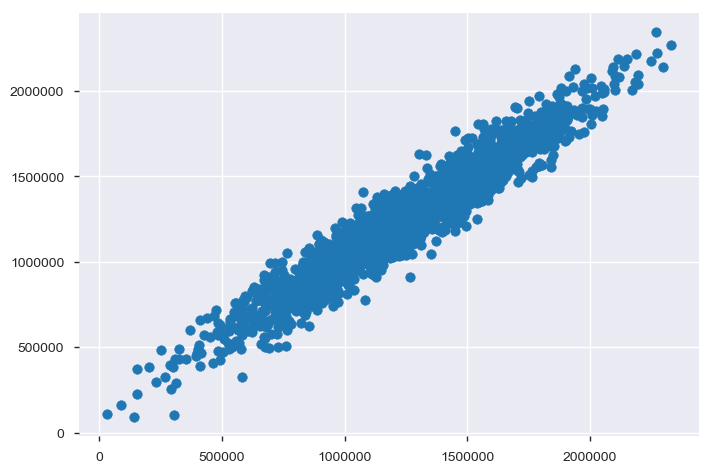

In [26]:
plt.scatter(y_test,predictions)

# Residual Histogram

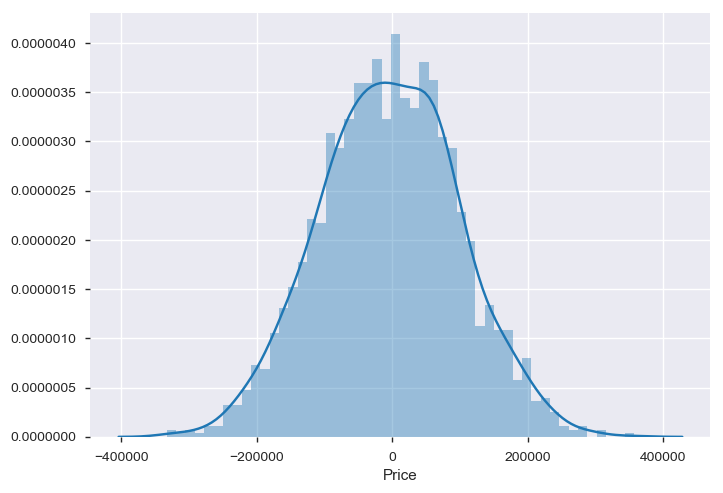

In [27]:
sns.distplot((y_test-predictions),bins=50);

# Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

# Mean Absolute Error (MAE)  is the mean of the absolute value of the errors:

1n∑i=1n|yi−ŷ i|


# Mean Squared Error (MSE) is the mean of the squared errors:

1n∑i=1n(yi−ŷ i)2


# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

1n∑i=1n(yi−ŷ i)2

# Comparing these metrics:

* **MAE** is the easiest to understand, because it's the average error.
* **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
* **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [28]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914957
MSE: 10460958907.209507
RMSE: 102278.82922291156
